In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing, Holt
import math


from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARIMA, ARMA
%matplotlib inline
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import files
uploaded = files.upload()

Saving Stock Price Data.csv to Stock Price Data.csv


In [3]:
df = pd.read_csv('Stock Price Data.csv')

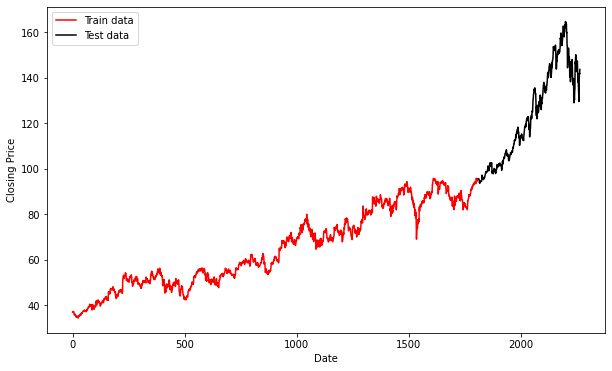

In [4]:
#split data into train and training set
Stock_data_exp = df['Close']
train_test_split_ratio = int(len(Stock_data_exp)*0.8)
train_data, test_data = Stock_data_exp[:train_test_split_ratio], Stock_data_exp[train_test_split_ratio:]


# Plotting the train and test sets.
plt.figure(figsize=(10,6))
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.plot(train_data, 'red', label='Train data')
plt.plot(test_data, 'black', label='Test data')
plt.legend()

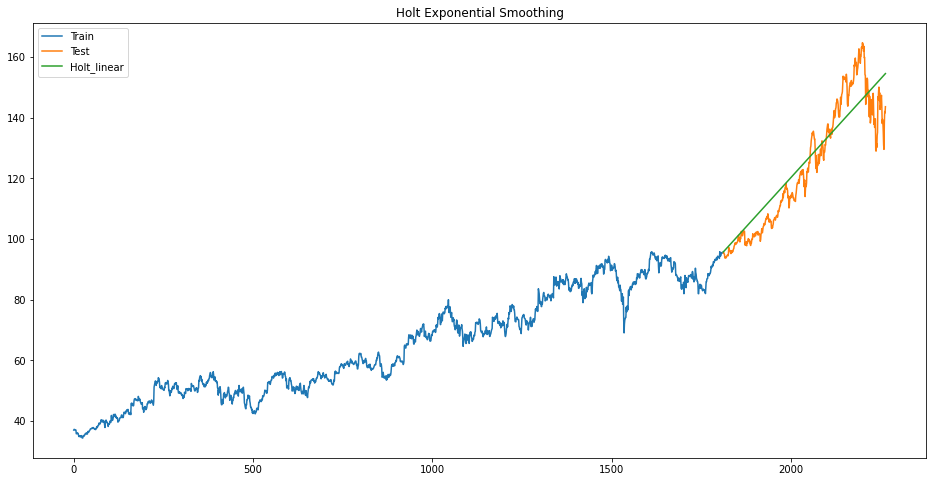

In [5]:
pred_values = test_data.copy()
pred_values = pd.DataFrame(pred_values)
holt_linear_df = pd.DataFrame(columns = ['RMS','Smoothing Level','Smoothing Slope'])

from itertools import permutations
perm = permutations(list(np.linspace(0.05,1,num=20)), 2)
for i in list(perm):
  fit_holt = Holt(np.asarray(train_data)).fit(smoothing_level = i[0],smoothing_slope=i[1])
  pred_values['Holt_linear'] = fit_holt.forecast(len(test_data))

  rms = round(math.sqrt(mean_squared_error(test_data.values, pred_values.Holt_linear)),3)
  holt_linear_df = holt_linear_df.append(other = {'RMS' : rms , 'Smoothing Level' : i[0], 'Smoothing Slope':i[1]} , ignore_index=True)

opt_values = holt_linear_df.loc[holt_linear_df['RMS'] == min(holt_linear_df['RMS']),['Smoothing Level','Smoothing Slope']].values


# Using optimised values from the lists.
fit_holt = Holt(np.asarray(train_data)).fit(smoothing_level = opt_values[0][0],smoothing_slope=opt_values[0][1])
pred_values['Holt_linear'] = fit_holt.forecast(len(test_data))

plt.figure(figsize=(16,8))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(pred_values['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.title('Holt Exponential Smoothing')
plt.show()

rms_holt_exp = math.sqrt(mean_squared_error(test_data.values, pred_values.Holt_linear))

In [6]:
pred_values

,Close,Holt_linear
1812,95.532003,95.774270
1813,95.567997,95.904405
1814,95.126999,96.034540
1815,95.010001,96.164675
1816,93.795003,96.294810
...,...,...
2260,129.597002,154.074779
2261,138.155997,154.204914
2262,142.079997,154.335049
2263,141.611993,154.465184


In [7]:
from google.colab import files
uploaded = files.upload()

Saving Sample Submission.csv to Sample Submission.csv


In [8]:
df_submission = pd.read_csv('Sample Submission.csv')

In [13]:
predictions = fit_holt.forecast(len(df_submission))

In [16]:
df_submission = df_submission.copy(deep=True)
df_submission['Close'] = predictions
df_submission.to_csv('HOLT_prediction.csv', index=False)

In [17]:
 files.download('HOLT_prediction.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>